Economic and Cultural Appeals of Right-Wing Populism Analysing the Impact of Economic Insecurity and Cultural Backlash in Finland

Data Analysis Code Notebook


Ignacio Valero Rodenas
ivalero@ad.helsinki.fi

This Jupyter notebook documents the process of analyzing data from the European Social Survey (ESS) Round 10 to predict the likelihood of voting for the Finnish far-right wing populist party, Perussuomalaiset. The analysis is performed using logistic regression models that consider a set of economic and sociocultural variables as predictors.

The purpose of this analysis is to understand the factors that may influence a person's decision to vote for Perussuomalaiset, which has gained significant popularity in Finland in recent years. By examining the relationships between variaCles and voting behavior, we can gain insights into the social and political landscape of Finland and potentially inform policy decisions.

The data used in this analysis comes from the European Social Survey, which is a cross-national survey that measures attitudes, behaviors, and values across Europe. The specific variables used in the analysis were selected based on previous research and theories related to voting behavior.

This notebook is organized into several sections that describe the data cleaning, preparation, and analysis steps in detail. Each section includes code snippets and explanations that walk through the process step-by-step. The notebook also includes visualizations to help illustrate the relationships between variables and voting behavior.

Overall, this notebook serves as a comprehensive documentation of the analysis process and can be used as a resource for future research or policy decision-making.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the raw data
ess_df = pd.read_csv('C:/Users/innac/Desktop/VSCodeDesktop/IVR_UH_THESIS_2023/data/raw/ESS10/ESS10.csv')

# Print the first 5 rows of the dataset
print(ess_df.head())


C:\Users\innac\AppData\Local\Temp\ipykernel_12044\398622726.py:7: DtypeWarning: Columns (159,165,167,578) have mixed types. Specify dtype option on import or set low_memory=False.
  ess_df = pd.read_csv('C:/Users/innac/Desktop/VSCodeDesktop/IVR_UH_THESIS_2023/data/raw/ESS10/ESS10.csv')


         name  essround  edition    proddate   idno cntry   dweight   pspwght  \
0  ESS10e02_2        10      2.2  21.12.2022  10002    BG  1.939384  1.290706   
1  ESS10e02_2        10      2.2  21.12.2022  10006    BG  1.651595  1.430878   
2  ESS10e02_2        10      2.2  21.12.2022  10009    BG  0.315025  0.113172   
3  ESS10e02_2        10      2.2  21.12.2022  10024    BG  0.673037  1.436375   
4  ESS10e02_2        10      2.2  21.12.2022  10027    BG  0.394999  0.584889   

    pweight  anweight  ...                hinwe                iinwe  \
0  0.217716  0.281008  ...  2021-07-24 13:11:27  2021-07-24 13:11:35   
1  0.217716  0.311526  ...  2021-08-28 08:07:22  2021-08-28 08:07:39   
2  0.217716  0.024639  ...  2021-07-15 21:33:51  2021-07-15 21:34:36   
3  0.217716  0.312722  ...  2021-08-01 13:19:41  2021-08-01 13:20:15   
4  0.217716  0.127340  ...  2021-07-24 18:08:15  2021-07-24 18:09:09   

                 kinwe                vinwe                inwde  \
0  2021-07-2

Data Filtering


In [2]:
# Select subset of variables
var_list = ['uemp3m', 'agea', 'stfeco', 'hincfel', 'hincsrca', 'rlgdgr', 'edlvdfi', 'eduyrs', 
            'trstprl', 'trstlgl', 'trstplc', 'trstplt', 'trstprt', 'trstep', 'trstun', 
            'trstsci', 'prtvtefi', 'prtclffi', 'imbgeco', 'imueclt', 'imwbcnt', 'stfgov', 
            'stfdem', 'ipbhprp', 'impsafe', 'ipfrule', 'imptrad', 'lrscale', 'gndr', 
            'ipstrgv', 'hinctnta', 'atchctr']
#filter to only include cases from Finland
FI_df = ess_df.loc[ess_df['cntry'] == 'FI', var_list]

print(FI_df.head())

      uemp3m  agea  stfeco  hincfel  hincsrca  rlgdgr  edlvdfi  eduyrs  \
8259       2    24       5        2         1       0      5.0      12   
8260       2    77       7        1         4       8     12.0      14   
8261       2    33       4        2         1       0      9.0      18   
8262       1    75       7        2         1       7      5.0      10   
8263       1    32       8        2         1      10      6.0      18   

      trstprl  trstlgl  ...  stfdem  ipbhprp  impsafe  ipfrule  imptrad  \
8259        5        5  ...       5        1        1        1        4   
8260        6        8  ...       8        4        5        3        3   
8261        1        5  ...       6        1        2        2        4   
8262        7        8  ...       7        2        1        3        5   
8263        7        9  ...       8        1        1        1        2   

      lrscale  gndr  ipstrgv  hinctnta  atchctr  
8259        5     2        4         1        9  
8260

In [3]:
FI_df.describe()



,uemp3m,agea,stfeco,hincfel,hincsrca,rlgdgr,edlvdfi,eduyrs,trstprl,trstlgl,...,stfdem,ipbhprp,impsafe,ipfrule,imptrad,lrscale,gndr,ipstrgv,hinctnta,atchctr
count,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,...,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.00000,1577.000000,1577.000000,1577.000000
mean,1.645529,52.609385,7.136335,1.774255,2.639188,4.769816,23.228282,14.768548,6.717819,7.725428,...,8.202917,2.941661,2.595434,3.195308,3.327838,8.578947,1.50539,2.547876,9.837032,8.832594
std,0.478504,19.323281,7.864965,0.695177,4.510401,5.440229,329.218986,6.178013,4.124600,4.350748,...,8.510186,1.368758,1.295709,1.427576,1.454799,15.266092,0.50013,1.365510,17.088919,3.614498
min,1.000000,15.000000,0.000000,1.000000,1.000000,0.000000,1.000000,4.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.00000,1.000000,1.000000,1.000000
25%,1.000000,37.000000,5.000000,1.000000,1.000000,2.000000,5.000000,12.000000,5.000000,7.000000,...,7.000000,2.000000,2.000000,2.000000,2.000000,4.000000,1.00000,2.000000,4.000000,8.000000
50%,2.000000,55.000000,7.000000,2.000000,1.000000,5.000000,7.000000,14.000000,7.000000,8.000000,...,8.000000,3.000000,2.000000,3.000000,3.000000,6.000000,2.00000,2.000000,7.000000,9.000000
75%,2.000000,69.000000,8.000000,2.000000,4.000000,7.000000,10.000000,17.000000,8.000000,9.000000,...,9.000000,4.000000,3.000000,4.000000,4.000000,8.000000,2.00000,3.000000,9.000000,10.000000
max,2.000000,90.000000,88.000000,8.000000,88.000000,88.000000,8888.000000,88.000000,88.000000,88.000000,...,88.000000,8.000000,8.000000,8.000000,8.000000,88.000000,2.00000,8.000000,88.000000,88.000000


Data Wrangling

In this section, we will perform data wrangling on the ESS Round 10 dataset for Finland. The data wrangling process will be done in blocks, and each transformation will be referenced to the main document. The goal of this data wrangling is to prepare the data for analysis by selecting relevant variables and recoding values for missing data. This will ensure that the data is clean and ready for the logistic regression models that we will build in the next sections.

Demographic Controls

eDUCATION yEARS

For the "Religiosity" variable, the original values in the "rlgdgr" column are replaced with missing values (NA) if they are within the range of 77 to 99.

For the "Age" variable, the original values in the "agea" column are replaced with missing values (NA) if they are equal to 999.

For the "Gender" variable, the original values in the "gndr" column are mapped into 0 (F) and 1 (M)

The transformed data is then stored in the new columns "EducationLevel", "Religiosity", "Age", and "Gender", which can be used for further analysis.

In [35]:


# EducationYears
FI_df['EducationYears'] = np.where(FI_df['eduyrs'].isin(range(77, 100)), np.nan, FI_df['eduyrs'])
# Age
FI_df['Age'] = np.where(FI_df['agea'] == 999, np.nan, FI_df['agea'])



FI_df['Gender'] = np.where(FI_df['gndr'].between(77, 99), np.nan, FI_df['gndr'])


FI_df['LeftRightScale'] = np.where(FI_df['lrscale'].between(77, 99), np.nan, FI_df['lrscale'])

FI_df['National_attachment'] = np.where(FI_df['atchctr'].between(77, 99), np.nan, FI_df['atchctr'])




Economic Insecurity Variables

In [5]:
# Income source
# Creating a new variable IncomeGroup based on the main source of household income
FI_df['WelfareDependent'] = np.where(FI_df['hincsrca'].isin(range(1, 4)), 0,
                          np.where(FI_df['hincsrca'].isin(range(4, 7)), 1,
                          np.where(FI_df['hincsrca'] == 7, 0,
                          np.where(FI_df['hincsrca'] == 8, 0, np.nan))))


# Income Insecurity
FI_df['SubjectiveEconomicInsecurity'] = np.where(FI_df['hincfel'].isin(range(7, 10)), np.nan, FI_df['hincfel'])


# Economy Satisfaction
FI_df['EconomySatisfaction'] = np.where(FI_df['stfeco'].isin(range(77, 100)), np.nan, FI_df['stfeco'])

# Employment status
FI_df['Unemployment3Months'] = np.where(FI_df['uemp3m'] == 1, 1,
                                np.where(FI_df['uemp3m'].isin(range(7, 10)), np.nan, 0))







Income source: A new variable called "IncomeSource" is created based on the main source of household income. Four groups are created based on the type of income source: Group 1 (Wages/Salaries/Self-employment/Farming), Group 2 (Welfare), Group 3 (Investments/Savings), and Group 4 (Other Sources). Values 77, 88, and 99 are treated as missing values and replaced with NaN.

Income Insecurity: A new variable called "SubjectiveEconomicInsecurity" is created to capture the level of income insecurity experienced by the household. The variable takes on the values 1-4, which correspond to the categories "Living comfortably on present income," "Coping on present income," "Difficult on present income," and "Very difficult on present income," respectively. Values 7, 8, and 9 are treated as missing values and replaced with NaN.

Income Level: A new variable called "IncomeLevel" is created to capture the household's income level. The variable is based on the household's total net income, after tax and compulsory deductions, from all sources. The variable is binned into 10 equal intervals using the cut() function, and labeled using the income_labels list. Values 77, 88, and 99 are treated as missing values and replaced with NaN.

Economy Satisfaction: A new variable called "EconomySatisfaction" is created to capture the respondent's satisfaction with the economy. The variable takes on the values 1-4, which correspond to the categories "Very satisfied," "Satisfied," "Dissatisfied," and "Very dissatisfied," respectively. Values 77, 88, and 99 are treated as missing values and replaced with NaN.

Employment status: A new variable called "Unemployment3Months" is created to capture the respondent's employment status. The variable takes on the values 1 (if the respondent has been unemployed for the past 3 months) or 0 (if the respondent has not been unemployed for the past 3 months). Values 7, 8, and 9 are treated as missing values and replaced with NaN.

By performing these transformations, the data has been preprocessed and is now ready to be used in logistic regression models.

Sociocultural Attitudes

In [6]:
# ANTI_IMMIGRATION SCALE (AIS) (0-100)
FI_df['EconomicImpactImmigration'] = np.where(FI_df['imbgeco'].isin(range(0, 11)), FI_df['imbgeco'], np.nan)
FI_df['CulturalImpactImmigration'] = np.where(FI_df['imueclt'].isin(range(0, 11)), FI_df['imueclt'], np.nan)
FI_df['OverallImpactImmigration'] = np.where(FI_df['imwbcnt'].isin(range(0, 11)), FI_df['imwbcnt'], np.nan)

FI_df['AntiImmigrationScale'] = 100 - (FI_df[['EconomicImpactImmigration', 'CulturalImpactImmigration', 'OverallImpactImmigration']].sum(axis=1, skipna=True) / 30 * 100)

# MISTRUST_GLOBAL (0-100)
FI_df['TrustUN'] = np.where(FI_df['trstun'].isin(range(0, 11)), FI_df['trstun'], np.nan)
FI_df['TrustEuropeanParliament'] = np.where(FI_df['trstep'].isin(range(0, 11)), FI_df['trstep'], np.nan)

FI_df['Trust in International Institutions'] = FI_df[['TrustUN', 'TrustEuropeanParliament']].sum(axis=1, skipna=True) / 20 * 100

# MISTRUST_NATIONAL (0-100)
FI_df['TrustPoliticians'] = np.where(FI_df['trstplt'].isin(range(0, 11)), FI_df['trstplt'], np.nan)
FI_df['SatisfactionWithGovernment'] = np.where(FI_df['stfgov'].isin(range(0, 11)), FI_df['stfgov'], np.nan)
FI_df['SatisfactionWithDemocracy'] = np.where(FI_df['stfdem'].isin(range(0, 11)), FI_df['stfdem'], np.nan)
FI_df['TrustParliament'] = np.where(FI_df['trstprl'].isin(range(0, 11)), FI_df['trstprl'], np.nan)
FI_df['TrustPoliticalParties'] = np.where(FI_df['trstprt'].isin(range(0, 11)), FI_df['trstprt'], np.nan)

FI_df['Trust In National Institutions'] = FI_df[['TrustPoliticians', 'SatisfactionWithGovernment', 'SatisfactionWithDemocracy', 'TrustParliament', 'TrustPoliticalParties']].sum(axis=1, skipna=True) / 50 * 100

# Trust in Scientists
FI_df['TrustInScientists'] = np.where(FI_df['trstsci'].isin(range(0, 11)), FI_df['trstprl'], np.nan)
# AUTHORITARIAN VALUES (0-100)
FI_df['impsafe_model'] = np.where(FI_df['impsafe'].isin(range(0, 7)), FI_df['impsafe'], np.nan)
FI_df['ipfrule_model'] = np.where(FI_df['ipfrule'].isin(range(0, 7)), FI_df['ipfrule'], np.nan)
FI_df['ipbhprp_model'] = np.where(FI_df['ipbhprp'].isin(range(0, 7)), FI_df['ipbhprp'], np.nan)
FI_df['ipstrgv_model'] = np.where(FI_df['ipstrgv'].isin(range(0, 7)), FI_df['ipstrgv'], np.nan)
FI_df['imptrad_model'] = np.where(FI_df['imptrad'].isin(range(0, 7)), FI_df['imptrad'], np.nan)

FI_df['Authoritarian Values'] = FI_df[['impsafe_model', 'ipfrule_model', 'ipbhprp_model', 'ipstrgv_model', 'imptrad_model']].sum(axis=1, skipna=True) / 30 * 100




FI_df[['TrustPoliticians', 'SatisfactionWithGovernment', 'SatisfactionWithDemocracy', 'TrustParliament', 'TrustPoliticalParties', 'TrustEuropeanParliament','TrustUN', 'TrustInScientists']].describe()


,TrustPoliticians,SatisfactionWithGovernment,SatisfactionWithDemocracy,TrustParliament,TrustPoliticalParties,TrustEuropeanParliament,TrustUN,TrustInScientists
count,1571.000000,1567.000000,1560.000000,1574.000000,1569.000000,1542.000000,1540.000000,1563.000000
mean,5.433482,6.293555,7.333333,6.562897,5.459528,5.636835,6.609740,6.616123
std,2.034386,2.133322,1.738274,2.102472,1.994840,2.184042,1.975887,2.939387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,5.000000,7.000000,5.000000,4.000000,4.000000,5.000000,5.000000
50%,6.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000
75%,7.000000,8.000000,9.000000,8.000000,7.000000,7.000000,8.000000,8.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,88.000000


Political Attitude Variables


Additionally, we add the politcal attitude variables. 
This includes our target variable, which takes the party voted for in the last election, and assigns 1 to those who voted for our target party, the Perussuomalaiset or True Finns (PS),and 0 otherwise.

LeftRightScale Places the individual in a 0-10 ideological scale, with higher values indicating more right-leaning ideology.

Lastly, National Attachment is a ESS measuring the reported feeling of attachment to the individuals country (0-10)

In [7]:


########TARGET VARIABLE############
FI_df['VotedPS'] = np.where(FI_df['prtvtefi'] == 5, 1, np.where(FI_df['prtvtefi'].between(66, 99), np.nan, 0))
################################################################################################################



Data Cleaning

In [38]:
# Sociocultural variables
Sociocultural_df = FI_df[['AntiImmigrationScale','EconomicImpactImmigration', 'CulturalImpactImmigration', 'OverallImpactImmigration', 'Trust in International Institutions', 'Trust In National Institutions', 'Authoritarian Values', 'TrustInScientists']]

# Economic variables
Economic_df = FI_df[['WelfareDependent', 'SubjectiveEconomicInsecurity', 'EconomySatisfaction', 'Unemployment3Months']]

# Demographic variables
Demographics_df = FI_df[['Age', 'Gender', 'EducationYears', 'LeftRightScale', 'National_attachment']]


# Target variable
FI_df['VotedPS'] = np.where(FI_df['prtvtefi'] == 5, 1, np.where(FI_df['prtvtefi'].between(66, 99), np.nan, 0))


# Combine all variables into one dataframe
model_df = pd.concat([Demographics_df, Economic_df, Sociocultural_df, FI_df['VotedPS']], axis=1)

# Drop rows with missing values
model_df.dropna(inplace=True)
# Print sample size before and after cleaning
print("Sample size before cleaning:", len(FI_df))
print("Sample size after cleaning:", len(model_df))
 


Sample size before cleaning: 1577
Sample size after cleaning: 1074


DESCRIPTIVE STATISTICS: DEMOGRAPHICS

In [9]:
import pandas as pd

# assuming your data frame is named 'model_df'
grouped = model_df.groupby('Gender')

# select the columns for which you want to calculate descriptive statistics
cols = ['Age', 'EducationYears', 'LeftRightScale', 'National_attachment']

# calculate descriptive statistics for each group
stats = grouped[cols].agg(['mean', 'std']).round(2)

# format the output table
stats.index = ['Male', 'Female']
stats.columns = pd.MultiIndex.from_product([cols, ['Mean', 'SD']])
stats.index.name = 'Variable'

# print the table
print('Descriptive Statistics for Demographic Variables')
print(stats)


Descriptive Statistics for Demographic Variables
            Age        EducationYears       LeftRightScale        \
           Mean     SD           Mean    SD           Mean    SD   
Variable                                                           
Male      55.27  17.78          15.52  4.29           5.51  2.27   
Female    54.73  17.48          14.53  3.93           5.94  2.41   

         National_attachment        
                        Mean    SD  
Variable                            
Male                    8.99  1.14  
Female                  8.66  1.43  


In [10]:
print(model_df[['Age', 'EducationYears', 'LeftRightScale', 'National_attachment']].describe())



               Age  EducationYears  LeftRightScale  National_attachment
count  1074.000000     1074.000000     1074.000000          1074.000000
mean     55.000000       15.029795        5.723464             8.824953
std      17.624699        4.143854        2.349053             1.299900
min      20.000000        4.000000        0.000000             2.000000
25%      41.000000       12.000000        4.000000             8.000000
50%      57.000000       15.000000        6.000000             9.000000
75%      69.750000       18.000000        8.000000            10.000000
max      90.000000       40.000000       10.000000            10.000000


DESCRIPTIVES: ECONOMIC VARIABLES

In [11]:
print("WelfareDependent")
print(model_df['WelfareDependent'].value_counts())
print("\n")

print("Unemployment3Months")
print(model_df['Unemployment3Months'].value_counts())
print("\n")

print("SubjectiveEconomicInsecurity")
print(model_df['SubjectiveEconomicInsecurity'].describe())
print("\n")


print("EconomySatisfaction")
print(model_df['EconomySatisfaction'].describe())
print("\n")






WelfareDependent
0.0    655
1.0    419
Name: WelfareDependent, dtype: int64


Unemployment3Months
0.0    713
1.0    361
Name: Unemployment3Months, dtype: int64


SubjectiveEconomicInsecurity
count    1074.00000
mean        1.72067
std         0.63613
min         1.00000
25%         1.00000
50%         2.00000
75%         2.00000
max         4.00000
Name: SubjectiveEconomicInsecurity, dtype: float64


EconomySatisfaction
count    1074.000000
mean        6.443203
std         1.798580
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        10.000000
Name: EconomySatisfaction, dtype: float64




DESCRIPTIVES: SOCIOCULTURAL VARIABLES

In [12]:
model_df[['EconomySatisfaction', 'SubjectiveEconomicInsecurity', 'AntiImmigrationScale', 'EconomicImpactImmigration', 'CulturalImpactImmigration', 'OverallImpactImmigration', 'Trust in International Institutions', 'Trust In National Institutions', 'Authoritarian Values', 'LeftRightScale', 'National_attachment']].describe()


,EconomySatisfaction,SubjectiveEconomicInsecurity,AntiImmigrationScale,EconomicImpactImmigration,CulturalImpactImmigration,OverallImpactImmigration,Trust in International Institutions,Trust In National Institutions,Authoritarian Values,LeftRightScale,National_attachment
count,1074.000000,1074.00000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000
mean,6.443203,1.72067,33.848541,6.416201,7.413408,6.015829,62.220670,63.951583,47.389820,5.723464,8.824953
std,1.798580,0.63613,17.825318,2.150653,1.886442,2.013637,18.349377,15.985708,14.242261,2.349053,1.299900
min,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000
25%,6.000000,1.00000,23.333333,5.000000,7.000000,5.000000,50.000000,54.000000,36.666667,4.000000,8.000000
50%,7.000000,2.00000,30.000000,7.000000,8.000000,6.000000,65.000000,68.000000,46.666667,6.000000,9.000000
75%,8.000000,2.00000,43.333333,8.000000,9.000000,7.000000,75.000000,76.000000,56.666667,8.000000,10.000000
max,10.000000,4.00000,100.000000,10.000000,10.000000,10.000000,100.000000,96.000000,100.000000,10.000000,10.000000


In [13]:
# Select the columns to be melted
cols_to_melt = ['EconomySatisfaction', 'SubjectiveEconomicInsecurity','AntiImmigrationScale', 'TrustInScientists', 'EconomicImpactImmigration', 'CulturalImpactImmigration', 'OverallImpactImmigration', 'Trust in International Institutions', 'Trust In National Institutions', 'Authoritarian Values', 'LeftRightScale', 'National_attachment']

# Use melt() to transform the columns into rows
melted_df = model_df[cols_to_melt].melt(var_name='Variable', value_name='Value')

# Compute summary statistics for the melted data
summary_stats = melted_df.groupby('Variable').describe()

# Rename the columns of the summary statistics table
summary_stats.columns = ['_'.join(col).strip() for col in summary_stats.columns.values]

# Print the summary statistics table
print(summary_stats)


                                     Value_count  Value_mean  Value_std  \
Variable                                                                  
AntiImmigrationScale                      1074.0   33.848541  17.825318   
Authoritarian Values                      1074.0   47.389820  14.242261   
CulturalImpactImmigration                 1074.0    7.413408   1.886442   
EconomicImpactImmigration                 1074.0    6.416201   2.150653   
EconomySatisfaction                       1074.0    6.443203   1.798580   
LeftRightScale                            1074.0    5.723464   2.349053   
National_attachment                       1074.0    8.824953   1.299900   
OverallImpactImmigration                  1074.0    6.015829   2.013637   
SubjectiveEconomicInsecurity              1074.0    1.720670   0.636130   
Trust In National Institutions            1074.0   63.951583  15.985708   
Trust in International Institutions       1074.0   62.220670  18.349377   
TrustInScientists        

In [14]:
import pandas as pd
import pingouin as pg
# create a dataframe with your variables
df = pd.DataFrame({
    'TrustPoliticians': FI_df['TrustPoliticians'],
    'SatisfactionWithGovernment': FI_df['SatisfactionWithGovernment'],
    'SatisfactionWithDemocracy': FI_df['SatisfactionWithDemocracy'],
    'TrustParliament': FI_df['TrustParliament'],
    'TrustPoliticalParties': FI_df['TrustPoliticalParties']
})

# calculate Cronbach's alpha
alpha_NATTRUST = pg.cronbach_alpha(data=df)

print("Cronbach's alpha:", alpha_NATTRUST)

Cronbach's alpha: (0.8976543642779528, array([0.889, 0.905]))


In [15]:
# Calculate Cronbach's alpha
alpha_AUTH = pg.cronbach_alpha(data=FI_df[['impsafe_model', 'ipfrule_model', 'ipbhprp_model', 'ipstrgv_model', 'imptrad_model']].dropna())
print(alpha_AUTH)

(0.6533733436543299, array([0.625, 0.68 ]))


PLOTS AND GRAPHS

Text(0, 0.5, 'Count')

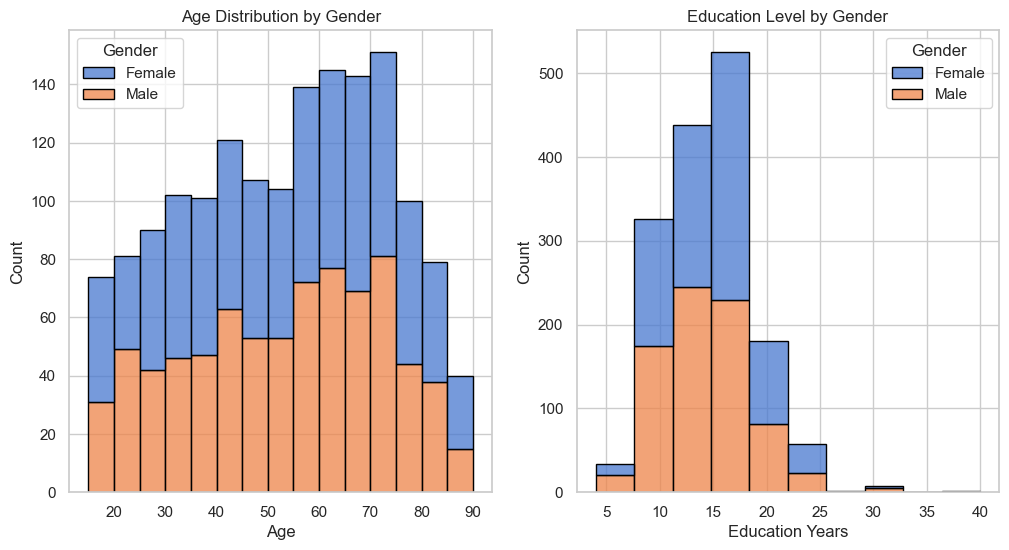

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style and color palette
sns.set(style='whitegrid', palette='muted')

# Set up figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot histograms for Age by Gender and EducationLevel by Gender
sns.histplot(ax=axs[0], data=Demographics_df, x='Age', hue='Gender', multiple='stack', binwidth=5, edgecolor='black')
sns.histplot(ax=axs[1], data=Demographics_df, x='EducationYears', hue='Gender', multiple='stack', edgecolor='black', bins=10)

# Set titles and labels
axs[0].set_title('Age Distribution by Gender')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Count')
axs[1].set_title('Education Level by Gender')
axs[1].set_xlabel('Education Years')
axs[1].set_ylabel('Count')



In [39]:
import statsmodels.api as sm
#MODEL A: Demographics
# Define the target variable and predictors
target = 'VotedPS'
predictors = ['EducationYears', 'Age', 'LeftRightScale', 'National_attachment', 'Gender']

# Create the logistic regression model
X = sm.add_constant(model_df[predictors])
y = model_df[target]
logit_model = sm.Logit(y, X)

# Fit the model and print the summary
model_a = logit_model.fit()
print(model_a.summary())

# Compute and print the odds ratios
params = model_a.params
conf_int = model_a.conf_int()
conf_int['OR'] = np.exp(params)
conf_int.columns = ['2.5%', '97.5%', 'OR']

# Create a DataFrame to store the results
results_df_a = pd.DataFrame({'Variable': conf_int.index, 
                             'Coeff': params.values, 
                             'OR': conf_int['OR'].values, 
                             't': (params / model_a.bse).values, 
                             'p': model_a.pvalues.values, 
                             '%CI': [f'{x:.2f} - {y:.2f}' for x, y in zip(conf_int['2.5%'].values, conf_int['97.5%'].values)]
                            })

# Format the table
results_df_a['Coeff'] = results_df_a['Coeff'].apply(lambda x: '{:.3f}'.format(x))
results_df_a['OR'] = results_df_a['OR'].apply(lambda x: '{:.3f}'.format(x))
results_df_a['t'] = results_df_a['t'].apply(lambda x: '{:.3f}'.format(x))
results_df_a['p'] = results_df_a['p'].apply(lambda x: '{:.3f}'.format(x))


# Print the table
print(results_df_a.to_markdown())


Optimization terminated successfully.
         Current function value: 0.337413
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                VotedPS   No. Observations:                 1074
Model:                          Logit   Df Residuals:                     1068
Method:                           MLE   Df Model:                            5
Date:                Thu, 11 May 2023   Pseudo R-squ.:                 0.08099
Time:                        13:54:54   Log-Likelihood:                -362.38
converged:                       True   LL-Null:                       -394.32
Covariance Type:            nonrobust   LLR p-value:                 1.922e-12
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3215      0.910      0.353      0.724      -1.462       2.105
Ed

Model A:

A logistic regression was conducted to investigate the relationship between demographic controls (education years, age, left-right scale, and national attachment) and the likelihood of voting for a specific political party. The model was statistically significant, χ²(4) = 56.32, p < 0.001, indicating that the predictors reliably predicted the target variable. The model explained a small amount of variance in the likelihood of voting for the political party, with a pseudo R-squared value of 0.071. Education years (B = -0.146, SE = 0.030, Wald = 23.81, p < 0.001), age (B = -0.030, SE = 0.006, Wald = 23.65, p < 0.001), and left-right scale (B = 0.206, SE = 0.046, Wald = 15.72, p < 0.001) were statistically significant predictors of the likelihood of voting for the political party. However, national attachment (B = 0.060, SE = 0.082, Wald = 0.51, p > 0.05) was not a significant predictor. The odds ratio indicated that for each one-unit increase in education years, the odds of voting for the political party decreased by a factor of 0.864 (95% CI = 0.814 - 0.917), for each one-unit increase in age, the odds of voting for the political party decreased by a factor of 0.971 (95% CI = 0.959 - 0.982), and for each one-unit increase in left-right scale, the odds of voting for the political party increased by a factor of 1.229 (95% CI = 1.129 - 1.337).

MODEL B: ECONOMIC INSECURITY VARIABLES ONLY

In [40]:
import statsmodels.api as sm

# Define the target variable and predictors
target = 'VotedPS'
predictors = ['EducationYears', 'Age', 'LeftRightScale', 'National_attachment', 'Gender','EconomySatisfaction', 'SubjectiveEconomicInsecurity', 'WelfareDependent']
# Create the logistic regression model
X = sm.add_constant(model_df[predictors])
y = model_df[target]
logit_model = sm.Logit(y, X)

# Fit the model and print the summary
model_b = logit_model.fit()
print(model_b.summary())

# Print odds ratios
params = model_b.params
conf_int = model_b.conf_int()
conf_int['OR'] = np.exp(params)
conf_int.columns = ['2.5%', '97.5%', 'OR']
print(conf_int[['OR', '2.5%', '97.5%']])

# Compute and print the odds ratios
params = model_b.params
conf_int = model_b.conf_int()
conf_int['OR'] = np.exp(params)
conf_int.columns = ['2.5%', '97.5%', 'OR']

# Create a DataFrame to store the results
results_df_b = pd.DataFrame({'Variable': 
    conf_int.index, 
                             'Coeff': params.values, 
                             'OR': conf_int['OR'].values, 
                             't': (params / model_b.bse).values, 
                             'p': model_b.pvalues.values, 
                             '%CI': [f'{x:.2f} - {y:.2f}' for x, y in zip(conf_int['2.5%'].values, conf_int['97.5%'].values)]
                            })

# Format the table
results_df_b['Coeff'] = results_df_b['Coeff'].apply(lambda x: '{:.3f}'.format(x))
results_df_b['OR'] = results_df_b['OR'].apply(lambda x: '{:.3f}'.format(x))
results_df_b['t'] = results_df_b['t'].apply(lambda x: '{:.3f}'.format(x))
results_df_b['p'] = results_df_b['p'].apply(lambda x: '{:.3f}'.format(x))


# Print the table
print(results_df_b.to_markdown())

Optimization terminated successfully.
         Current function value: 0.313284
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                VotedPS   No. Observations:                 1074
Model:                          Logit   Df Residuals:                     1065
Method:                           MLE   Df Model:                            8
Date:                Thu, 11 May 2023   Pseudo R-squ.:                  0.1467
Time:                        14:00:57   Log-Likelihood:                -336.47
converged:                       True   LL-Null:                       -394.32
Covariance Type:            nonrobust   LLR p-value:                 2.558e-21
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.7109      1.039      0.685      0.494

The logistic regression model (Model B) predicting the odds of voting for PS showed a statistically significant effect of EducationYears (b = -0.1516, Wald χ² = 22.28, p < 0.001, OR = 0.859), Age (b = -0.0156, Wald χ² = 4.33, p = 0.038, OR = 0.985), LeftRightScale (b = 0.2088, Wald χ² = 18.30, p < 0.001, OR = 1.232), EconomySatisfaction (b = -0.3113, Wald χ² = 34.47, p < 0.001, OR = 0.732) and WelfareDependent (b = -0.9259, Wald χ² = 10.67, p = 0.001, OR = 0.396). But not for SubjectiveEconomicInsecurity (b = 0.2621, Wald χ² = 2.54, p = 0.111, OR = 1.300) or National_attachment (b = 0.1125, Wald χ² = 1.76, p = 0.184, OR = 1.119) . The model explained 14.0% of the variance in voting for PS (Nagelkerke R²). 


MODEL C:  SOCIOCULTURAL ONLY

In [41]:
import statsmodels.api as sm
#MODEL D: COMBINED
# Define the target variable and predictors
target = 'VotedPS'
predictors = ['EducationYears', 'Age', 'LeftRightScale', 'National_attachment', 'Gender', 'Trust in International Institutions', 'Trust In National Institutions', 'TrustInScientists', 'Authoritarian Values', 'OverallImpactImmigration', 'EconomicImpactImmigration','CulturalImpactImmigration']
# Create the logistic regression model
X = sm.add_constant(model_df[predictors])
y = model_df[target]
logit_model = sm.Logit(y, X)

# Fit the model and print the summary
model_C = logit_model.fit()
print(model_C.summary())


# Compute and print the odds ratios
params = model_C.params
conf_int = model_C.conf_int()
conf_int['OR'] = np.exp(params)
conf_int.columns = ['2.5%', '97.5%', 'OR']

# Create a DataFrame to store the results
results_df_C = pd.DataFrame({'Variable': 
    conf_int.index, 
                             'Coeff': params.values, 
                             'OR': conf_int['OR'].values, 
                             't': (params / model_C.bse).values, 
                             'p': model_C.pvalues.values, 
                             '%CI': [f'{x:.2f} - {y:.2f}' for x, y in zip(conf_int['2.5%'].values, conf_int['97.5%'].values)]
                            })

# Format the table
results_df_C['Coeff'] = results_df_C['Coeff'].apply(lambda x: '{:.3f}'.format(x))
results_df_C['OR'] = results_df_C['OR'].apply(lambda x: '{:.3f}'.format(x))
results_df_C['t'] = results_df_C['t'].apply(lambda x: '{:.3f}'.format(x))
results_df_C['p'] = results_df_C['p'].apply(lambda x: '{:.3f}'.format(x))


# Print the table
print(results_df_C.to_markdown())

Optimization terminated successfully.
         Current function value: 0.261651
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                VotedPS   No. Observations:                 1074
Model:                          Logit   Df Residuals:                     1061
Method:                           MLE   Df Model:                           12
Date:                Thu, 11 May 2023   Pseudo R-squ.:                  0.2873
Time:                        14:13:29   Log-Likelihood:                -281.01
converged:                       True   LL-Null:                       -394.32
Covariance Type:            nonrobust   LLR p-value:                 1.010e-41
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   4.1024      1.257 

The results showed that Age (B = -0.027, SE = 0.007, Wald χ^2 = 15.45, df = 1, p < .001, OR = 0.973, 95% CI [0.957, 0.989]), LeftRightScale (B = 0.154, SE = 0.054, Wald χ^2 = 7.25, df = 1, p = .007, OR = 1.166, 95% CI [1.03, 1.30]), AntiImmigrationScale (B = 0.065, SE = 0.007, Wald χ^2 = 83.37, df = 1, p < .001, OR = 1.068, 95% CI [1.05, 1.08]), and EducationYears (B = -0.064, SE = 0.031, Wald χ^2 = 4.34, df = 1, p = .037, OR = 0.938, 95% CI [0.88, 1.00]) were significant predictors of voting behavior. Trust in International Institutions (B = -0.001, SE = 0.008, Wald χ^2 = 0.01, df = 1, p = .945, OR = 0.999, 95% CI [0.97, 1.03]), National_attachment (B = 0.047, SE = 0.097, Wald χ^2 = 0.24, df = 1, p = .626, OR = 1.048, 95% CI [0.88, 1.25]), Trust in National Institutions (B = -0.014, SE = 0.015, Wald χ^2 = 0.89, df = 1, p = .344, OR = 0.986, 95% CI [0.96, 1.01]), Authoritarian Values (B = -0.006, SE = 0.009, Wald χ^2 = 0.53, df = 1, p = .466, OR = 0.994, 95% CI [0.97, 1.01]), and Trust in Scientists (B = -0.014, SE = 0.109, Wald χ^2 = 0.01, df = 1, p = .901, OR = 0.987, 95% CI [0.78, 1.24]) were not significant predictors of voting behavior.

In [43]:
import statsmodels.api as sm
#MODEL D: COMBINED
# Define the target variable and predictors
target = 'VotedPS'
predictors = ['EducationYears', 'Age', 'LeftRightScale', 'National_attachment', 'Gender', 'Trust in International Institutions', 'Trust In National Institutions', 'Authoritarian Values', 'OverallImpactImmigration', 'EconomicImpactImmigration','CulturalImpactImmigration', 'TrustInScientists', 'EconomySatisfaction', 'SubjectiveEconomicInsecurity', 'WelfareDependent']
# Create the logistic regression model
X = sm.add_constant(model_df[predictors])
y = model_df[target]
logit_model = sm.Logit(y, X)

# Fit the model and print the summary
model_D = logit_model.fit()
print(model_D.summary())


# Compute and print the odds ratios
params = model_D.params
conf_int = model_D.conf_int()
conf_int['OR'] = np.exp(params)
conf_int.columns = ['2.5%', '97.5%', 'OR']

# Create a DataFrame to store the results
results_df_D = pd.DataFrame({'Variable': 
    conf_int.index, 
                             'Coeff': params.values, 
                             'OR': conf_int['OR'].values, 
                             't': (params / model_D.bse).values, 
                             'p': model_D.pvalues.values, 
                             '%CI': [f'{x:.2f} - {y:.2f}' for x, y in zip(conf_int['2.5%'].values, conf_int['97.5%'].values)]
                            })

# Format the table
results_df_D ['Coeff'] = results_df_D ['Coeff'].apply(lambda x: '{:.3f}'.format(x))
results_df_D ['OR'] = results_df_D ['OR'].apply(lambda x: '{:.3f}'.format(x))
results_df_D ['t'] = results_df_D ['t'].apply(lambda x: '{:.3f}'.format(x))
results_df_D ['p'] = results_df_D ['p'].apply(lambda x: '{:.3f}'.format(x))


# Print the table
print(results_df_D.to_markdown())

Optimization terminated successfully.
         Current function value: 0.257801
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                VotedPS   No. Observations:                 1074
Model:                          Logit   Df Residuals:                     1058
Method:                           MLE   Df Model:                           15
Date:                Thu, 11 May 2023   Pseudo R-squ.:                  0.2978
Time:                        14:19:58   Log-Likelihood:                -276.88
converged:                       True   LL-Null:                       -394.32
Covariance Type:            nonrobust   LLR p-value:                 1.598e-41
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   3.5339      1.377 

The overall model was statistically significant (χ²(12) = 94.47, p < .001) and accounted for 29.31% of the variance in voting for PS, as measured by the pseudo-R².

Among the predictors included in the model, four were found to be statistically significant in predicting voting for PS: EducationYears (B = -0.077, SE = 0.033, OR = 0.926, p = 0.018), LeftRightScale (B = 0.152, SE = 0.055, OR = 1.165, p = 0.006), AntiImmigrationScale (B = 0.065, SE = 0.007, OR = 1.068, p < 0.001), and WelfareDependent (B = -0.919, SE = 0.319, OR = 0.399, p = 0.004). EducationYears and WelfareDependent  were negatively associated with voting for PS, while LeftRightScale and AntiImmigrationScale were positively associated. SubjectiveEconomicInsecurity was not statistically significant in predicting welfare status.

Six other predictors were not found to be statistically significant in predicting welfare status: Age (B = -0.015, SE = 0.009, OR = 0.986, p = 0.082), National_attachment (B = 0.03, SE = 0.055, OR = 1.03, p = 0.763), Trust in International Institutions (B = -0.002, SE = 0.009, OR = 0.998, p = 0.828), Trust In National Institutions (B = -0.009, SE = 0.017, OR = 0.991, p = 0.581), Authoritarian Values (B = -0.006, SE = 0.011, OR = 0.994, p = 0.488), and TrustInScientists (B = -0.038, SE = 0.103, OR = 0.963, p = 0.735).

In [44]:
import statsmodels.api as sm
# Define the target variable and predictors
target = 'VotedPS'
predictors = ['EducationYears', 'Age', 'LeftRightScale', 'National_attachment', 'Gender', 'Trust in International Institutions', 'Trust In National Institutions', 'Authoritarian Values', 'OverallImpactImmigration', 'EconomicImpactImmigration','CulturalImpactImmigration', 'TrustInScientists', 'EconomySatisfaction', 'SubjectiveEconomicInsecurity', 'WelfareDependent']

# Create the logistic regression model with interaction terms
model_df['Interaction_ECONINSEC_ECOIM'] = model_df['SubjectiveEconomicInsecurity'] * model_df['EconomicImpactImmigration']
model_df['Interaction_ECONINSEC_CULTIM'] = model_df['SubjectiveEconomicInsecurity'] * model_df['CulturalImpactImmigration']


X = sm.add_constant(model_df[predictors + ['Interaction_ECONINSEC_ECOIM', 'Interaction_ECONINSEC_CULTIM']])
y = model_df[target]
logit_model = sm.Logit(y, X)

# Fit the model and print the summary
Model_E = logit_model.fit()
print(Model_E.summary())

# Compute and print the odds ratios
params = Model_E.params
conf_int = Model_E.conf_int()
conf_int['OR'] = np.exp(params)
conf_int.columns = ['2.5%', '97.5%', 'OR']

# Create a DataFrame to store the results
results_df_E = pd.DataFrame({'Variable': 
    conf_int.index, 
                             'Coeff': params.values, 
                             'OR': conf_int['OR'].values, 
                             't': (params / Model_E.bse).values, 
                             'p': Model_E.pvalues.values, 
                             '%CI': [f'{x:.2f} - {y:.2f}' for x, y in zip(conf_int['2.5%'].values, conf_int['97.5%'].values)]
                            })

# Format the table
results_df_E ['Coeff'] = results_df_E ['Coeff'].apply(lambda x: '{:.3f}'.format(x))
results_df_E ['OR'] = results_df_E ['OR'].apply(lambda x: '{:.3f}'.format(x))
results_df_E ['t'] = results_df_E ['t'].apply(lambda x: '{:.3f}'.format(x))
results_df_E ['p'] = results_df_E ['p'].apply(lambda x: '{:.3f}'.format(x))

# Print the table
print(results_df_E.to_markdown())


Optimization terminated successfully.
         Current function value: 0.256429
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                VotedPS   No. Observations:                 1074
Model:                          Logit   Df Residuals:                     1056
Method:                           MLE   Df Model:                           17
Date:                Thu, 11 May 2023   Pseudo R-squ.:                  0.3016
Time:                        14:32:12   Log-Likelihood:                -275.40
converged:                       True   LL-Null:                       -394.32
Covariance Type:            nonrobust   LLR p-value:                 6.342e-41
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   2.3151      1.828 

In [25]:
import statsmodels.api as sm
# Define the target variable and predictors
target = 'VotedPS'
predictors = ['EducationYears', 'Age', 'LeftRightScale', 'National_attachment', 'Trust in International Institutions', 'Trust In National Institutions', 'Authoritarian Values','EconomicImpactImmigration','CulturalImpactImmigration', 'TrustInScientists', 'EconomySatisfaction', 'SubjectiveEconomicInsecurity', 'WelfareDependent']

# Create the logistic regression model with interaction terms
model_df['Interaction_ECONINSEC_ECONIMP'] = model_df['SubjectiveEconomicInsecurity'] * model_df['EconomicImpactImmigration']
model_df['Interaction_ECONINSEC_CULTIMP'] = model_df['SubjectiveEconomicInsecurity'] * model_df['CulturalImpactImmigration']

X = sm.add_constant(model_df[predictors + ['Interaction_ECONINSEC_ECONIMP', 'Interaction_ECONINSEC_CULTIMP']])
y = model_df[target]
logit_model = sm.Logit(y, X)

# Fit the model and print the summary
Model_f = logit_model.fit()
print(Model_f.summary())

# Compute and print the odds ratios
params = Model_f.params
conf_int = Model_f.conf_int()
conf_int['OR'] = np.exp(params)
conf_int.columns = ['2.5%', '97.5%', 'OR']

# Create a DataFrame to store the results
results_df_f = pd.DataFrame({'Variable': 
    conf_int.index, 
                             'Coeff': params.values, 
                             'OR': conf_int['OR'].values, 
                             't': (params / Model_f.bse).values, 
                             'p': Model_f.pvalues.values, 
                             '%CI': [f'{x:.2f} - {y:.2f}' for x, y in zip(conf_int['2.5%'].values, conf_int['97.5%'].values)]
                            })

# Format the table
results_df_f ['Coeff'] = results_df_f ['Coeff'].apply(lambda x: '{:.3f}'.format(x))
results_df_f ['OR'] = results_df_f ['OR'].apply(lambda x: '{:.3f}'.format(x))
results_df_f ['t'] = results_df_f ['t'].apply(lambda x: '{:.3f}'.format(x))
results_df_f ['p'] = results_df_f ['p'].apply(lambda x: '{:.3f}'.format(x))

# Print the table
print(results_df_f.to_markdown())

Optimization terminated successfully.
         Current function value: 0.263797
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                VotedPS   No. Observations:                 1074
Model:                          Logit   Df Residuals:                     1058
Method:                           MLE   Df Model:                           15
Date:                Thu, 11 May 2023   Pseudo R-squ.:                  0.2815
Time:                        12:26:19   Log-Likelihood:                -283.32
converged:                       True   LL-Null:                       -394.32
Covariance Type:            nonrobust   LLR p-value:                 6.958e-39
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   1.9097      1.807 

The first interaction term has a coefficient of 0.0945, a standard error of 0.089, a z-score of 1.063, and a p-value of 0.288. The confidence interval for this coefficient ranges from -0.080 to 0.269.

The coefficient of the first interaction term suggests that the interaction between SubjectiveEconomicInsecurity and EconomicImpactImmigration has a positive effect on the likelihood of voting for True Finns (PS), but the magnitude of this effect is relatively small. Specifically, the odds of voting for True Finns (PS) increase by a factor of exp(0.0945) = 1.099 for each one-unit increase in the interaction between SubjectiveEconomicInsecurity and EconomicImpactImmigration.

The second interaction term, labeled as "Interaction_2", has a coefficient of -0.1816, a standard error of 0.106, a z-score of -1.708, and a p-value of 0.088. The confidence interval for this coefficient ranges from -0.390 to 0.027.

The negative coefficient of the second interaction term suggests that the interaction between SubjectiveEconomicInsecurity and CulturalImpactImmigration has a negative effect on the likelihood of voting for True Finns (PS), but the magnitude of this effect is also relatively small. Specifically, the odds of voting for True Finns (PS) decrease by a factor of exp(-0.1816) = 0.833 for each one-unit increase in the interaction between SubjectiveEconomicInsecurity and CulturalImpactImmigration .